# Visualising crystal structures with fresnel and matplotlib

This example takes some crystal structures and visualises them with fresnel and matplotlib. 
It requires fresnel to be installed from conda-forge with `conda install fresnel -c conda-forge`.

In [1]:
from matador.utils.viz_utils import fresnel_plot
from matador.utils.optimade_utils import optimade2dict
import requests

In [2]:
crystals = [
    optimade2dict(structure) for structure in 
    requests.get("https://optimade.materialsproject.org/v1/structures?page_limit=6").json()["data"]
]

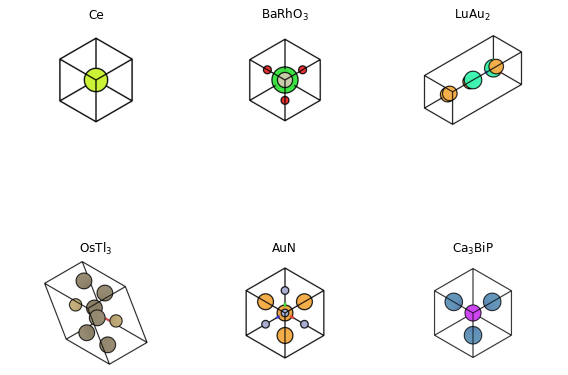

In [3]:
import matplotlib.pyplot as plt
fig, axes, scenes = fresnel_plot(crystals, fig_rows=2, figsize=(8, 8))
plt.tight_layout()

Optional: install PySide2 to use interactive scene views with fresnel. Useful for finding the desired camera angle for a given structure.

In [4]:
from PySide2 import QtCore
%gui qt
import fresnel.interact
view = fresnel.interact.SceneView(scenes[5])
view.show()
breakpoint()

In [5]:
# Move camera to desired position and observe changes
repr(scenes[5].camera)

'fresnel.camera.Orthographic(position=(6.2127504, 6.2127504, 6.2127504), look_at=(2.4425, 2.4425, 2.4425), up=(-0.4082483, 0.8164966, -0.4082483), height=11.753877639770508)'

In [6]:
from matador.utils.viz_utils import rerender_scenes_to_axes
rerender_scenes_to_axes(scenes, axes)

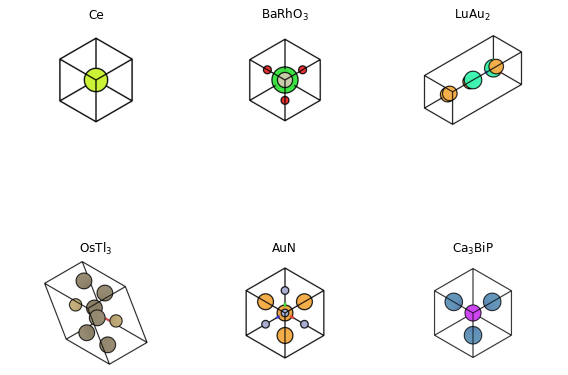

In [7]:
fig